# CH05-210103 Introduction to Earth System Data

Data inspection, visualisation and analysis can be scaled up to very complex and time-consuming tasks

Some useful resources are included in the last part of the [resources](https://github.com/aprossi/CH05-210103-IntroEarthData-students/blob/master/resources.md) file.

In particular, [Awesome Open Geoscience](https://github.com/softwareunderground/awesome-open-geoscience#how-to-contribute) is very valuable, e.g.


- [Basic Geoscience Cheat Sheet](https://static.squarespace.com/static/549dcda5e4b0a47d0ae1db1e/54a06d6ee4b0d158ed95f696/54a06d6fe4b0d158ed95fff0/1295033898443/Cheatsheet_basic.pdf) – Cheat Sheet for Basic Geoscience
- [Geophysics Cheat Sheet](https://static.squarespace.com/static/549dcda5e4b0a47d0ae1db1e/54a06d6ee4b0d158ed95f696/54a06d70e4b0d158ed9603f5/1350658645407/Cheatsheet_geophysics.pdf) – Cheat Sheet for Geophysics
- [Rock Physics Cheat Sheet](https://static.squarespace.com/static/549dcda5e4b0a47d0ae1db1e/54a06d6ee4b0d158ed95f696/54a06d6fe4b0d158ed960042/1374593568367/Cheatsheet_Rock_Physics.pdf) –  Cheat Sheet for Rock Physics
- [Petroleum Science Cheat Sheet](https://static.squarespace.com/static/549dcda5e4b0a47d0ae1db1e/54a06d6ee4b0d158ed95f696/54a06d6fe4b0d158ed96019e/1323808738753/Cheatsheet_petroleum.pdf) – Cheat Sheet for Petroleum Science

# 1-D: linear interpolation and fit

## Data plot

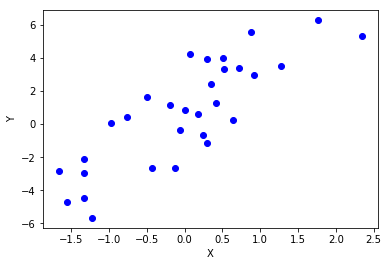

In [1]:
# for more see http://scipy-cookbook.readthedocs.io/items/idx_optimization_and_fitting.html
# e.g. http://scipy-cookbook.readthedocs.io/items/FittingData.html

# Create some random data:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
x = np.random.randn(30) # generate random X
y = 3*x+0.5+np.random.randn(30)*2 # generate random Y, being correlated with X and with some extra noise
fig = plt.figure() # create figure
ax1 = fig.add_subplot(111) # create subplot
ax1.scatter(x, y, color='b') # plot scatter
plt.xlabel('X')# labels
plt.ylabel('Y')
plt.show() # show plot inline

## Smoothing and interpolation

### Interpolation

In [2]:
# see 1d case from https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html

# see 1d case from https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
from scipy.interpolate import interp1d
# Create interpolation functions 
# (cool thing about python is that functions can return functions and other objects,
# like in case of scipy.interpolate.interp1d here):
f=interp1d(x,y) # Linear
f2 = interp1d(x, y, kind='cubic') # Cubic

xNew=np.linspace(x.min(),x.max(), num=50, endpoint=True) #define values to interpolate to
f(xNew)

array([-2.81608724, -4.18388224, -4.30814964, -3.62542485, -2.8035535 ,
       -5.26378925, -4.56238254, -2.61145768, -0.66053283,  0.13684236,
        0.29718011,  0.46131921,  0.83110769,  1.20089616,  1.57068464,
       -2.64589819, -1.40432564, -0.11887144,  1.06071694, -1.9087772 ,
        0.3046776 ,  3.29731754,  2.04479558, -0.14132549,  1.06691666,
        1.87400609,  2.67392113,  2.70472615,  0.6350876 ,  2.74865566,
        4.33794299,  5.54351525,  2.9910591 ,  3.12761401,  3.26416892,
        3.40072383,  3.55756509,  4.01500986,  4.47245463,  4.92989941,
        5.38734418,  5.84478896,  6.23700603,  6.10420563,  5.97140523,
        5.83860483,  5.70580443,  5.57300403,  5.44020363,  5.30740323])

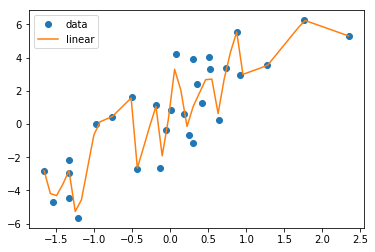

In [3]:
#lets plot Linear first:
plt.plot(x, y, 'o', xNew, f(xNew), '-')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

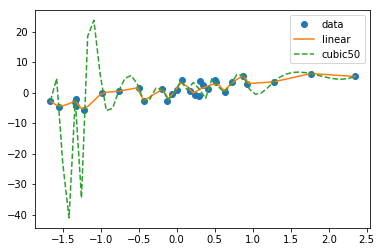

In [4]:
#try again with cubic
plt.plot(x, y, 'o', xNew, f(xNew), '-', xNew, f2(xNew), '--')
plt.legend(['data', 'linear', 'cubic50', 'cubic5000'], loc='best')
plt.show()

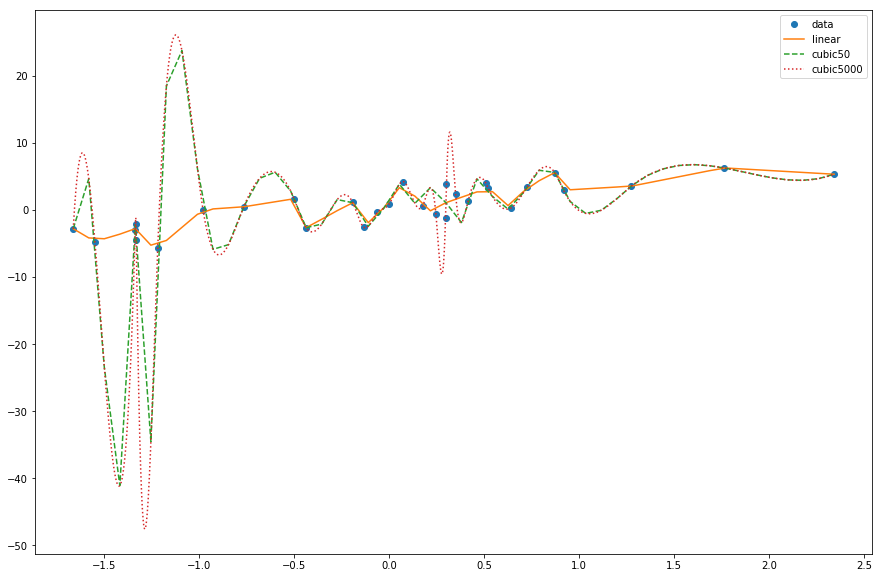

In [5]:
#Lets look at what happens if we increase the number of points on interpolation
xNewLong=np.linspace(x.min(),x.max(), num=5000, endpoint=True) #define values to interpolate to
plt.figure(figsize=(15,10)) # Lets make this a bigger figure
plt.plot(x, y, 'o', xNew, f(xNew), '-', xNew, f2(xNew), '--', xNewLong, f2(xNewLong), ':')
plt.legend(['data', 'linear', 'cubic50', 'cubic5000'], loc='best')
plt.show()

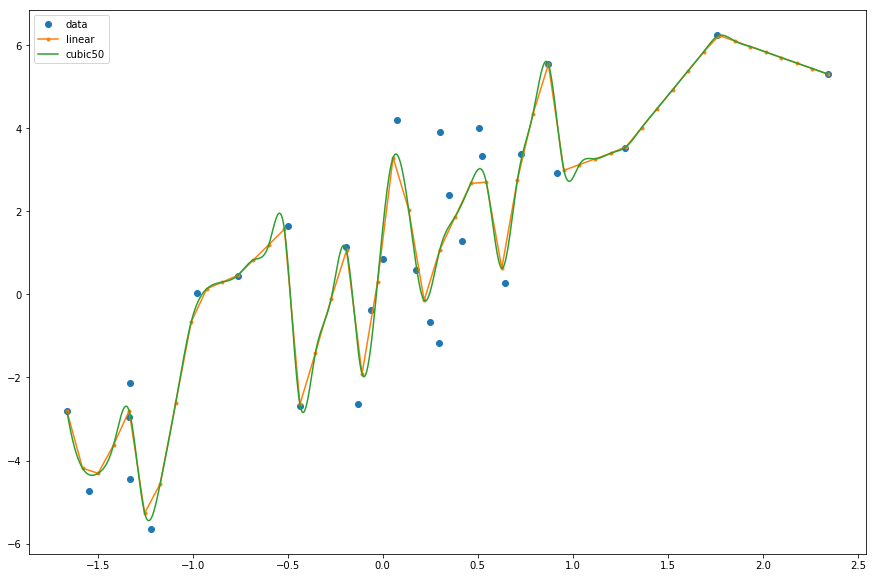

In [6]:
# As we can see from above example, while cubic interpolation produces a smoother line, 
# it really should be used with great caution: if your data is irregularly spaced, 
# cubic interpolation probably isn't for you. 
# A simple walkaround to this problem is to apply Cubic interpolation to data which 
# has been preprocessed with linear, for example:
xNewLong=np.linspace(x.min(),x.max(), num=5000, endpoint=True) #define values to interpolate to
plt.figure(figsize=(15,10)) # Lets make this a bigger figure
f3 = interp1d(xNew, f(xNew), kind='cubic')
plt.plot(x, y, 'o', xNew, f(xNew), '.-', xNewLong, f3(xNewLong), '-')
plt.legend(['data', 'linear', 'cubic50', 'cubic5000ofLinear'], loc='best')
plt.show()

### Smoothing

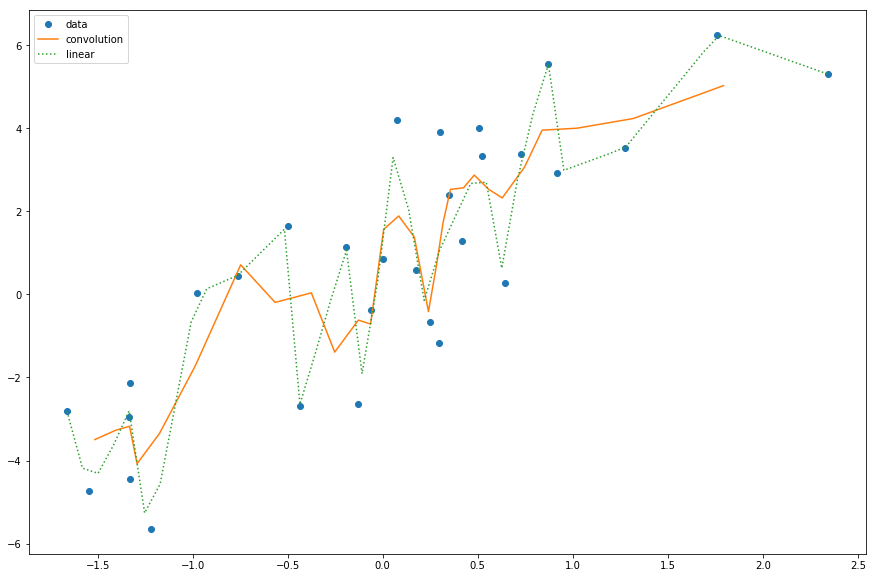

In [7]:
# A very common approach to reduce random error is to calculate a moving average, aka running mean,
# which can be done very efficiently with whats known as convolution filtering.
# One thing to remember before convolving an array, is that it needs to be sorted first
a = np.array([x,y])
s=a[:,np.argsort(a[0])]
xs=s[0]
ys=s[1]
kernelSize = 3
# Notice that our data is irregularly spaced, so we do convolution on both axes
# We could indeed convolve on only the y-axis, but the results will be worse
ysConvolve=np.convolve(ys, np.ones(kernelSize)/kernelSize, mode='valid') 
xsConvolve=np.convolve(xs, np.ones(kernelSize)/kernelSize, mode='valid')
plt.figure(figsize=(15,10))
plt.plot(xs, ys, 'o', xsConvolve, ysConvolve, '-', xNew, f(xNew), ':')
plt.legend(['data', 'convolution', 'linear', 'cubic5000ofLinear'], loc='best')
plt.show()

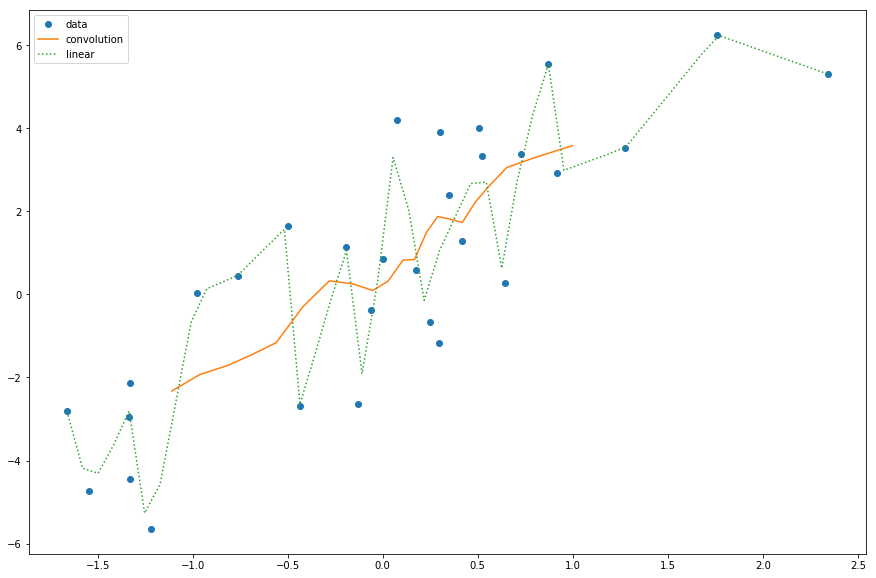

In [8]:
# Lets try increasing kernel size
a = np.array([x,y])
s=a[:,np.argsort(a[0])]
xs=s[0]
ys=s[1]
kernelSize = 10 # Change this from 3 to 10
ysConvolve=np.convolve(ys, np.ones(kernelSize)/kernelSize, mode='valid')
xsConvolve=np.convolve(xs, np.ones(kernelSize)/kernelSize, mode='valid')
plt.figure(figsize=(15,10))
plt.plot(xs, ys, 'o', xsConvolve, ysConvolve, '-', xNew, f(xNew), ':')
plt.legend(['data', 'convolution', 'linear', 'cubic5000ofLinear'], loc='best')
plt.show()

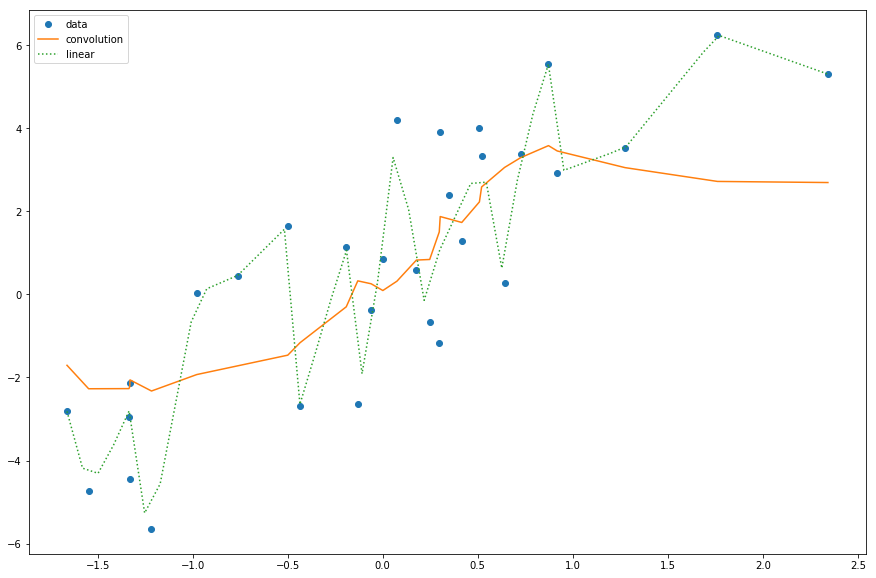

In [9]:
# The line gets shorter, but also much smoother. 
# Its possible to keep the line long, at a price of some distortion
a = np.array([x,y])
s=a[:,np.argsort(a[0])]
xs=s[0]
ys=s[1]
# endline distortions are more significant for larger kernels
# and steeper slopes
kernelSize = 10 
# change mode from 'valid' to 'same' and only convolve along y-axis, 
ysConvolve=np.convolve(ys, np.ones(kernelSize)/kernelSize, mode='same') 
#xsConvolve=np.convolve(xs, np.ones(kernelSize)/kernelSize, mode='same')
plt.figure(figsize=(15,10)) # Lets make this a bigger figure
plt.plot(xs, ys, 'o', xs, ysConvolve, '-', xNew, f(xNew), ':') #notice use of xs instead of xsConvolve
plt.legend(['data', 'convolution', 'linear', 'cubic5000ofLinear'], loc='best')
plt.show()



## Line/curve fitting

### Linear fitting

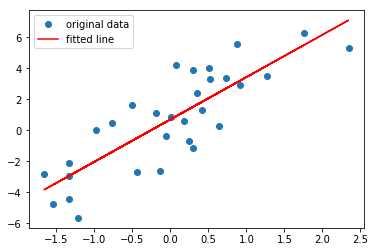

In [10]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# plot original data
plt.plot(x, y, 'o', label='original data')
# plot fitted line
plt.plot(x, intercept + slope*x, 'r', label='fitted line')

# add legend
plt.legend()
# draw figure
plt.show()

In [11]:
print("r-squared: ", r_value**2) 
print("standard error (standard deviation): ", std_err)
# e.g. see https://en.wikipedia.org/wiki/Standard_error


r-squared:  0.6912918873414652
standard error (standard deviation):  0.3446781659828973


### quadrating & cubic fit

In [12]:
# e.g. using poyfit
# see http://scipy-cookbook.readthedocs.io/items/LinearRegression.html
# see also http://scipy-cookbook.readthedocs.io/items/FittingData.html

In [13]:
from scipy import linspace, polyval, polyfit, sqrt, stats, randn
# e.g. using poyfit
# for fitting to more complex functions see also http://scipy-cookbook.readthedocs.io/items/FittingData.html

In [14]:
polyfit?

In [15]:
polyfit(x,y,2)

array([-0.21378306,  2.76163121,  0.89867619])

In [19]:
#change this to a formula and write out to lambda function:
coeff=polyfit(x,y,2)
f=lambda q: coeff[0]*q**2+coeff[1]*q**1+coeff[2]*q**0
#then we can calculate f(x):
print([f(q) for q in x])

[2.278378448038697, -3.155682132835892, 0.7300172985069864, 6.195367612841028, -2.0082460700647893, 1.8406989775769427, -1.3356681983227405, 2.582076705820338, -4.27928183636679, 5.100587699410346, 3.1455109014740485, 0.36129244299799756, 0.5330686054850535, 2.2489194395182475, -2.777628271199406, 1.7150444816478738, 2.7903255937600733, 0.9010290064037342, -3.1516810015222028, 1.568452574904172, 3.255108253744696, 1.7019503136130187, 4.073056880649638, -3.8866730251217705, 2.010809875461002, 1.3821129931659693, 1.1046359515152018, -3.1697693819876074, -0.5338190941607552, -0.34311663555732785]


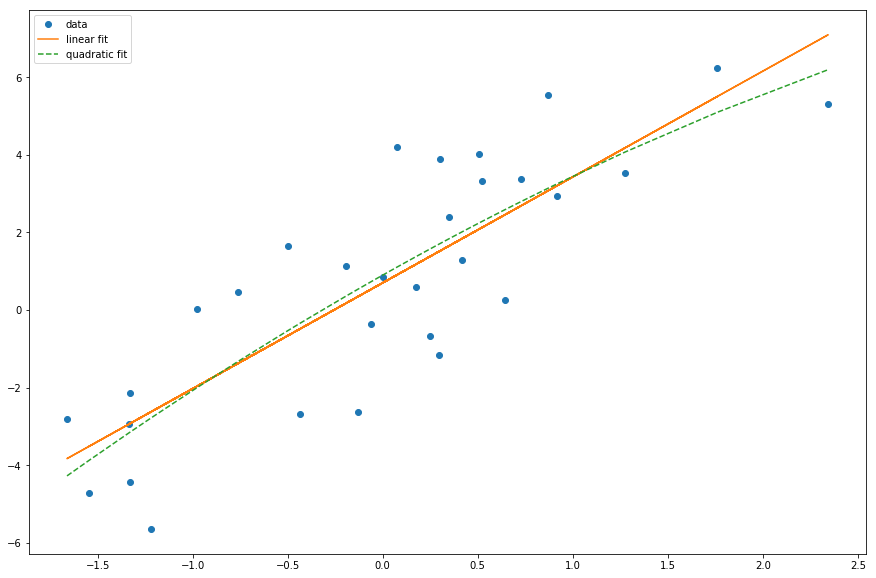

In [20]:
#and plot:
plt.figure(figsize=(15,10)) # Lets make this a bigger figure
plt.plot(xs, ys, 'o', x, intercept + slope*x, '-', xs, [f(q) for q in xs], '--', label='quadratic')
plt.legend(['data', 'linear fit', 'quadratic fit'])
plt.show()

In [21]:
# So what if we want a higher power fit? By combining built-in python functions of map and sum, 
# we can easily expand this to an arbitrary power:
# First let's take one more look at our lambda function:
#
#     f=lambda q: coeff[0]*q**2+coeff[1]*q**1+coeff[2]*q**0
#
# We notice that coefficient index increases while power decreases, they are basically inverted
# lets create a list to store to power
list(range(len(coeff)))

[0, 1, 2]

In [22]:
# Looks good, now we change that to a lambda function:
powerList=lambda coeff: list(range(len(coeff)))
# Let's try this for power of 2:
powerList(coeff)

[0, 1, 2]

In [23]:
#invert values using list comprehension:
powerList(coeff)[::-1]

[2, 1, 0]

In [24]:
#zip forward and inverted values into pairs:
list(zip(powerList(coeff),powerList(coeff)[::-1]))

[(0, 2), (1, 1), (2, 0)]

In [25]:
#lets run some tests
powers=lambda coeff: list(zip(powerList(coeff),powerList(coeff)[::-1]))

In [26]:
[c for c in coeff]

[-0.21378306356377155, 2.7616312070782074, 0.8986761916717612]

In [27]:
# at x=1, values of each mononomial in a polynomial is the same as coefficients,
# so this should be the same as above
[coeff[power] for power in powerList(coeff)]

[-0.21378306356377155, 2.7616312070782074, 0.8986761916717612]

In [28]:
# try this at x=2
[coeff[power[0]]*2**power[1] for power in powers(coeff)]

[-0.8551322542550862, 5.523262414156415, 0.8986761916717612]

In [29]:
sum([coeff[power[0]]*2**power[1] for power in powers(coeff)]) #sum the monomonials to get the result

5.5668063515730895

In [30]:
#check the above result with what we got earlier with f(x), to see if we're still on the right track:
f(2)

5.5668063515730895

In [31]:
#### Lets put everything together:
# coeff=polyfit(x,y,p)
# powers=lambda coeff: list(zip(powerList(coeff),powerList(coeff)[::-1]))
# getVal=lambda coeff: sum([coeff[power[0]]*2**power[1] for power in powers(coeff)])
# Make this into a single function for convinience:
def getPwrFit(x,y,p):
    coeff=polyfit(x,y,p)
    powers=lambda coeff: list(zip(powerList(coeff),powerList(coeff)[::-1]))
    getVal=lambda coeff, q: sum([coeff[power[0]]*q**power[1] for power in powers(coeff)])
    return lambda q: getVal(coeff,q)  # in python a function can return a function

In [32]:
#Let us try it with power of 2 (cubic fit), and see if result is the same as before:
newF=getPwrFit(x,y,2)
print(newF)
print(newF(2))

<function getPwrFit.<locals>.<lambda> at 0x1a125826a8>
5.5668063515730895


In [33]:
#lets test our new function on the whole list:
print(f(xs))
print(newF(xs)) # the values should be the same

[-4.27928184 -3.88667303 -3.16976938 -3.15568213 -3.151681   -2.77762827
 -2.00824607 -1.3356682  -0.53381909 -0.34311664  0.36129244  0.53306861
  0.7300173   0.90102901  1.10463595  1.38211299  1.56845257  1.70195031
  1.71504448  1.84069898  2.01080988  2.24891944  2.27837845  2.58207671
  2.79032559  3.1455109   3.25510825  4.07305688  5.1005877   6.19536761]
[-4.27928184 -3.88667303 -3.16976938 -3.15568213 -3.151681   -2.77762827
 -2.00824607 -1.3356682  -0.53381909 -0.34311664  0.36129244  0.53306861
  0.7300173   0.90102901  1.10463595  1.38211299  1.56845257  1.70195031
  1.71504448  1.84069898  2.01080988  2.24891944  2.27837845  2.58207671
  2.79032559  3.1455109   3.25510825  4.07305688  5.1005877   6.19536761]


In [34]:
#Now lets try to fit a power of 10!
getPwrFit(x,y,10)(xs)

array([-3.078856  , -3.82433682, -4.09232555, -4.06309039, -4.05458123,
       -2.95142989, -0.46609128,  0.21911751, -0.29020699, -0.39918299,
       -0.25903856, -0.08959858,  0.152565  ,  0.39167611,  0.69476349,
        1.11209727,  1.3831489 ,  1.57102448,  1.589196  ,  1.76182128,
        1.99330889,  2.32497794,  2.36747427,  2.83477357,  3.18631027,
        3.78647183,  3.94485085,  3.57920784,  6.24512647,  5.30770474])

/Users/anrossi/miniconda/envs/python3test/lib/python3.6/site-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys


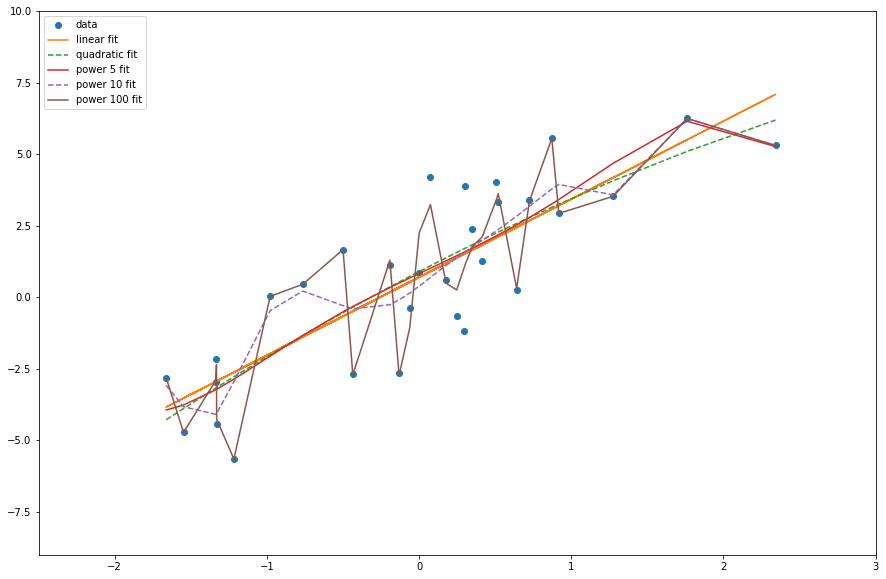

In [35]:
#and finally plot:
plt.figure(figsize=(15,10)) # Lets make this a bigger figure
plt.axis([-2.5, 3, -9, 10])
plt.plot(xs, ys, 'o', x, intercept + slope*x, '-', xs, [f(q) for q in xs], '--', xs, getPwrFit(x,y,5)(xs), '-',
         xs, getPwrFit(x,y,10)(xs), '--',xs, getPwrFit(x,y,100)(xs), '-', label='powers')
plt.legend(['data', 'linear fit', 'quadratic fit', 'power 5 fit', 'power 10 fit', 'power 100 fit'])
plt.show() # on a first glance looks nice, but...

/Users/anrossi/miniconda/envs/python3test/lib/python3.6/site-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys


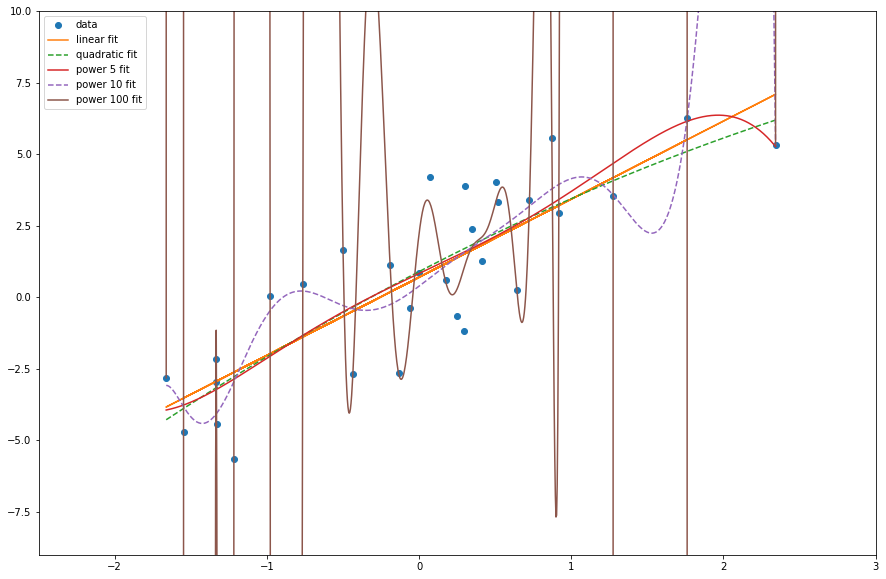

In [36]:
# as mentioned earlier, one has to be careful when applying polynomial fit! 
# At high enough power, one may be able to fit all of the points on the dataset, 
# however when looking at interpolated data with more points in-between measurements...
xlin=np.linspace(min(x),max(x), 1000)
plt.figure(figsize=(15,10)) # Lets make this a bigger figure
plt.axis([-2.5, 3, -9, 10])
plt.plot(xs, ys, 'o', x, intercept + slope*x, '-', xlin, [f(q) for q in xlin], '--', xlin, getPwrFit(x,y,5)(xlin), '-',
         xlin, getPwrFit(x,y,10)(xlin), '--',xlin, getPwrFit(x,y,100)(xlin), '-', label='powers')
plt.legend(['data', 'linear fit', 'quadratic fit', 'power 5 fit', 'power 10 fit', 'power 100 fit'])
plt.show() # the high order fits may no longer make any sense!

# Tasks

## T 5.1

Please use the dataaset in ```./data_samples/hdf/NEONDSTowerTemperatureData.hdf5``` and load data from the tower **STER** under **Domain_10**.

You can re-use code from  [notebook 04](CH05-210103_04-data-load.ipynb). You can also visually inspect data with PanoPly.

<img src="./images/tower.png" width="700px"> 


## T 5.2: Time series & some stats

* Download some time series cyclical data (e.g. temperature on HDF5 dataset - see lectures 3 and 4) and fit sinusoidal function to it (use google for inspiration).

Hint: use least squares regression - [https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html).

See also 
https://github.com/ltauxe/Python-for-Earth-Science-Students/blob/master/Lecture_26_time_series.ipynb
    

# Spectroscopy (common usage)

see https://github.com/openplanetary/planetarygeology-book 

https://github.com/openplanetary/planetarygeology-book/blob/master/spectral.ipynb

In [37]:
# Import spectra
# see https://github.com/openplanetary/planetarygeology-book

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd # we'll use pandas to load data
from scipy.interpolate import interp1d

# We'll be looking at phylosiclicates (clays), as they have a fairly complex spectra with many features:
# In the data_samples folder we have two spectra for Montmorillonite
specSlPhyMontm = pd.read_csv('../data_samples/spectral_data/FRTC596_537-220-5x5_Al-phyllo_montm.txt', 
                      skipinitialspace=True, sep=' ',
                      skiprows=3, header=None)

relabMontm = pd.read_csv('../data_samples/spectral_data/montmorillonite-1292F35-RELAB.txt', 
                      skipinitialspace=True, sep=' ',
                      skiprows=3, header=None)
# also we have two spectra for Nontronite
specFePhyNontr = pd.read_csv('../data_samples/spectral_data/FRTC596_537-220-5x5_Fe-phyllo_nontr.txt', 
                         skipinitialspace=True, sep=' ',
                         skiprows=3, header=None)

relabNontr = pd.read_csv('../data_samples/spectral_data/nontronite-CBJB26-RELAB.txt', 
                         skipinitialspace=True, sep=' ',
                         skiprows=3, header=None)

specFePhyNontr[:5] # take a look at what our data looks like

,0,1
0,1.00135,1.000000
1,1.00790,1.000000
2,1.01445,1.164158
3,1.02100,1.159755
4,1.02755,1.169514


In [38]:
#rename columns
specFePhyNontr.rename(columns={0:'wavelength',1:'specFePhyNontr'})[:5]

,wavelength,specFePhyNontr
0,1.00135,1.000000
1,1.00790,1.000000
2,1.01445,1.164158
3,1.02100,1.159755
4,1.02755,1.169514


In [39]:
#This worked, lets fix all dataframes now:
specSlPhyMontm = specSlPhyMontm.rename(columns={0:'wavelength',1:'specSlPhyMontm'})
relabMontm     = relabMontm.rename(columns={0:'wavelength',1:'relabMontm'})
specFePhyNontr = specFePhyNontr.rename(columns={0:'wavelength',1:'specFePhyNontr'})
relabNontr     = relabNontr.rename(columns={0:'wavelength',1:'relabNontr'})

In [40]:
#lets check:
relabNontr[:5]

,wavelength,relabNontr
0,0.3500,0.0324
1,0.3525,0.0340
2,0.3550,0.0356
3,0.3575,0.0368
4,0.3600,0.0380


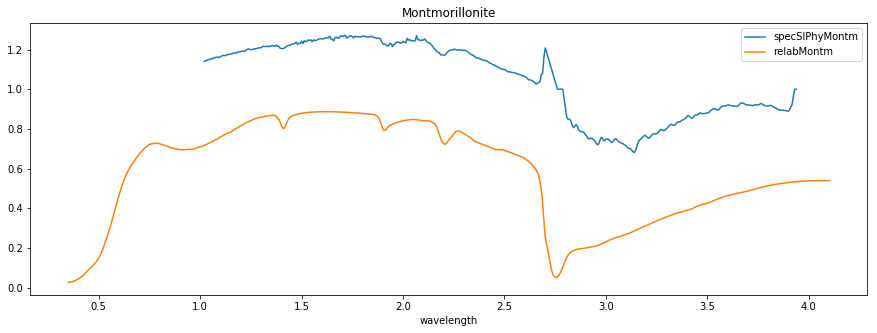

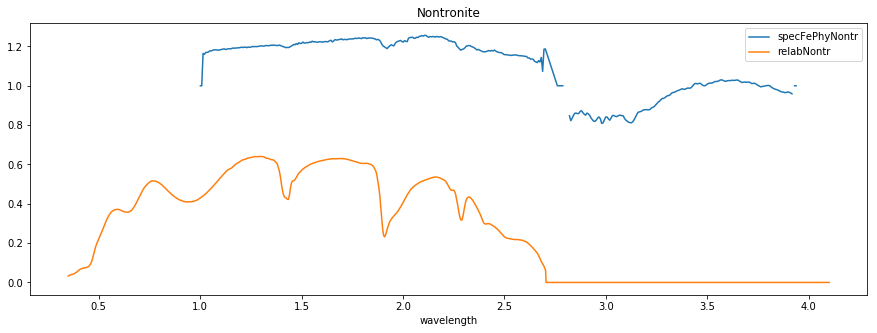

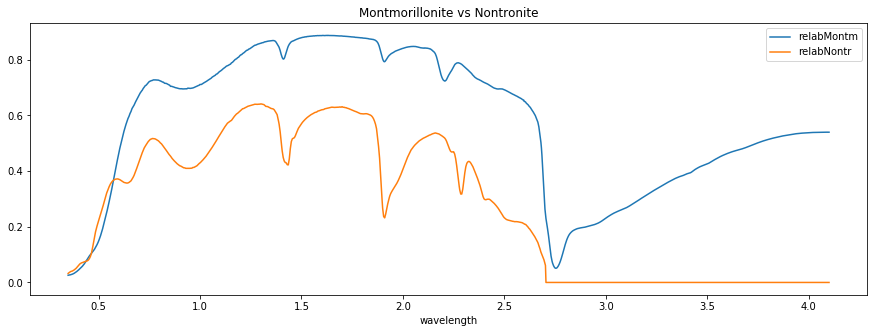

In [41]:
#lets plot:
ax1=specSlPhyMontm.plot.line(0, figsize=(15,5), title="Montmorillonite")
relabMontm.plot.line(0, ax=ax1) # ax=ax plots all on the same axis
ax2=specFePhyNontr.plot.line(0, figsize=(15,5), title="Nontronite")
relabNontr.plot.line(0, ax=ax2)
ax3=relabMontm.plot.line(0, figsize=(15,5), title="Montmorillonite vs Nontronite")
relabNontr.plot.line(0, ax=ax3)
plt.show()

## Continuum removal
When processing reflective spectrometry, we normally want to look at absorption features.

Remember that this is a plot of reflectivity against wavelength, the higher absorption means lower reflection,
so what we want to find are location of "troughs", ie local minima.

The first step we could do towards solving this non-trivial problem would be to remove continuum, or the shape of the spectra "at large" then the troughs would become more aparent and easier to identify.

For this example we shall use the *relabNontr* spectra, as it is the smoothest and would be easiest to show the process in an ideal case.

In this part of the tutorial we will show how not only how to apply code, but also how to write it, thus demonstrating the entire workflow of ad-hoc data analysis.

We begin by creating simple fake datasets to test our code while we're writing it, gradually increasing complexity
while develping code, and lastly applying it to real data.

In [43]:
# The first step is to consturct a convex hull around the function, this example is modified from
#https://github.com/mminin/QGIS-misc-plugins/blob/master/spec-continuum-removal/quickhull.py
import numpy as np
import math
import matplotlib.pyplot as plt

In [44]:
sample=np.asarray([[1,1],[2,1],[3,4],[4,3],[5,4]])

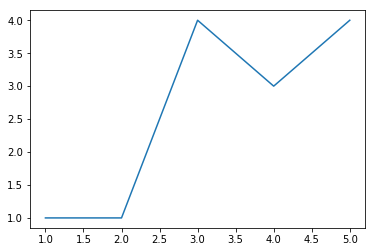

In [45]:
pivot=lambda sample: [[a[0] for a in sample],[a[1] for a in sample]]
pSample=pivot(sample)
plt.plot(pSample[0],pSample[1], '-')
plt.show()

In [46]:
pSampleLineX=[pSample[0][0],pSample[0][-1]]
pSampleLineY=[pSample[1][0],pSample[1][-1]]
pSampleLine=[pSampleLineX,pSampleLineY]

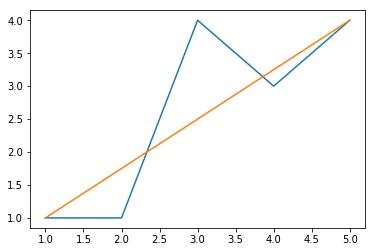

In [47]:
#lets draw a line from first point to the last point:
#sampleLine=[sample[0],sample[-1]]
#pSampleLine=pivot(sampleLine)
plt.plot(pSample[0],pSample[1], '-',pSampleLine[0],pSampleLine[1], '-')
plt.show()

In [48]:
#next we can interpoate our line to find out what values does it have at the points we've given
finterp = interp1d(pSampleLine[0],pSampleLine[1])#create interploation function

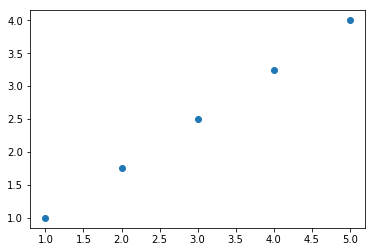

In [49]:
plt.plot(pSample[0],finterp(pSample[0]),'o') # check that interpolation worked
plt.show()

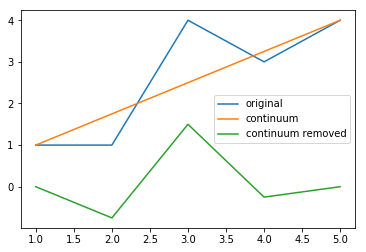

In [50]:
#now we can subtract interpolated values:
plt.plot(pSample[0],pSample[1], '-',pSampleLine[0],pSampleLine[1], '-',pSample[0],pSample[1]-finterp(pSample[0]),'-')
plt.legend(['original', 'continuum', 'continuum removed', 'cubic5000'], loc='best')
plt.show()

In [51]:
#lets put this into a function so we can reuse it later:
def removeCont(pSample):
    pSampleLineX=[pSample[0][0],pSample[0][-1]]
    pSampleLineY=[pSample[1][0],pSample[1][-1]]
    pSampleLine=[pSampleLineX,pSampleLineY]
    finterp = interp1d(pSampleLine[0],pSampleLine[1])#create interploation function
    return pSample[1]-finterp(pSample[0])

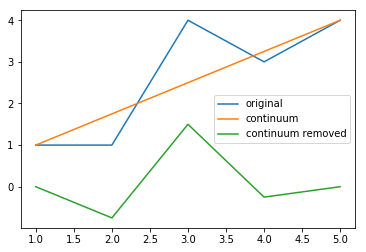

In [52]:
#test it:
plt.plot(pSample[0],pSample[1], '-',pSampleLine[0],pSampleLine[1], '-',pSample[0],removeCont(pSample),'-')
plt.legend(['original', 'continuum', 'continuum removed', 'cubic5000'], loc='best')
plt.show()

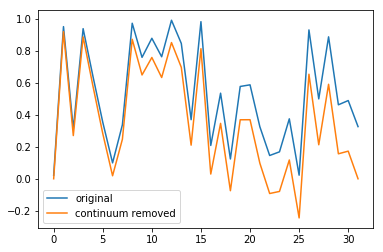

In [53]:
# Lets try this on a bigger fake dataset:

sample = np.asarray([list(x) for x in zip(range(32),[x[0] for x in np.random.random((32,1)).tolist()])])
pSample=pivot(sample)
plt.plot(pSample[0],pSample[1], '-',pSample[0],removeCont(pSample),'-')
plt.legend(['original', 'continuum removed'], loc='best')
plt.show()

In [58]:
#we can now easily find a maximum value above the continuum for points other than first and last:
max(removeCont(pSample)[1:-1])

0.9197688967838828

In [59]:
#furthermore, we can ask numpy for an index of max:
maxIndex=np.argmax(removeCont(pSample)[1:-1]) +1

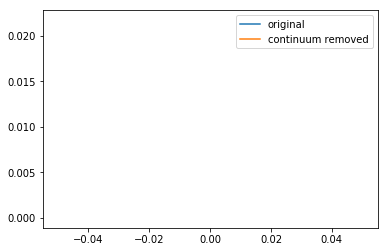

In [60]:
#Armed with this information we can repeat the previous step for a subset:
plt.plot(pSample[0][:maxIndex],pSample[1][:maxIndex], '-',pSample[0][:maxIndex],
         removeCont([pSample[0][:maxIndex],pSample[1][:maxIndex]]),'-')
plt.legend(['original', 'continuum removed'], loc='best')
plt.show()

In [61]:
# From henceforth we could do this recursively - that is to use the output of a function as an input to itself:
def getMaxima(pSample):
    def getMaximaInner(innerSample):
        contRem=removeCont(innerSample)
        #print(contRem)
        maxIndex=np.argmax(contRem)
        #print(maxIndex)
        maxVal=contRem[maxIndex]
        maxLoc=innerSample[0][maxIndex]
        if len(contRem)>2 and maxVal>contRem[0] and maxVal>contRem[-1]: # check that the maximum is more than edges
            maxLocArray.append(maxLoc)
            #print(maxLoc)
            subsetLeft=[innerSample[0][:maxIndex+1],innerSample[1][:maxIndex+1]]
            #print(subsetLeft[0])
            subsetRight=[innerSample[0][maxIndex:],innerSample[1][maxIndex:]]
            #print(subsetRight[0])
            getMaximaInner(subsetLeft)
            getMaximaInner(subsetRight)
    maxLocArray=[] #initialize array to store a list of points on a convex hull
    getMaximaInner(pSample)
    maxLocArray.sort()
    return [pSample[0][0]]+maxLocArray+[pSample[0][-1]]

In [62]:
#maxList=getMaxima([pSample[0][:5],pSample[1][:5]])
maxList=getMaxima(pSample)
print(maxList)

[0.0, 1.0, 12.0, 15.0, 26.0, 28.0, 31.0]


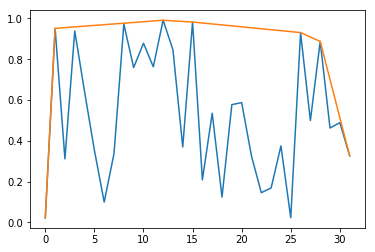

In [63]:
hull=[maxList,[x[1] for x in sample if x[0] in maxList]]
plt.plot(pSample[0],pSample[1], '-',hull[0],hull[1],'-')
plt.show()

[0.35, 0.555, 0.5575, 0.56, 0.565, 0.57, 0.745, 0.75, 0.7525, 0.755, 0.765, 1.235, 1.27001, 1.30001, 1.70002, 1.72002, 2.17503, 4.10007]


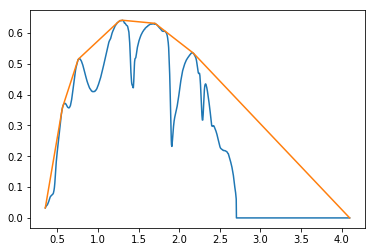

In [64]:
#Now lets try it with a real dataset:
sample=np.asarray(relabNontr)
pSample=pivot(sample)
maxList=getMaxima(pSample)
print(maxList)
hull=[maxList,[x[1] for x in sample if x[0] in maxList]]
plt.plot(pSample[0],pSample[1], '-',hull[0],hull[1],'-')

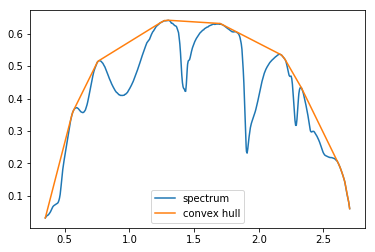

In [65]:
# You may notice that the formation of a convex hull is distorted 
# by a long row of zeros at the end of the data sample
# Lets remove all zeros:
cleanSample=[value for value in sample if value[1]>0]
pSample=pivot(cleanSample)
maxList=getMaxima(pSample)
#print(maxList)
pHull=[maxList,[x[1] for x in sample if x[0] in maxList]]
plt.plot(pSample[0],pSample[1], '-',pHull[0],pHull[1],'-')
plt.legend(['spectrum', 'convex hull'])
plt.show()

In [66]:
# Next we can subtact the convex hull from our data, in a manner similar to how we subtracted continuum ealier
def removeHull(pSample,pHull):
    finterp = interp1d(pHull[0],pHull[1])#create interploation function
    return pSample[1]-finterp(pSample[0])

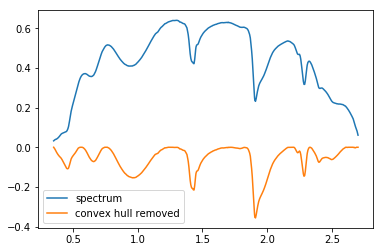

In [67]:
hullRemoved=removeHull(pSample,pHull)
plt.plot(pSample[0],pSample[1],'-',pSample[0],hullRemoved, '-')
plt.legend(['spectrum', 'convex hull removed'])
plt.show()

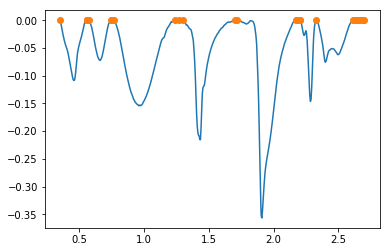

In [68]:
# Now we can easily determine the position of each absorption band  minima
# The first step involves segmenting spectra into bands, we can simply split our array at zeros
plt.plot(pSample[0],hullRemoved, '-',pHull[0], np.asarray(pHull[0])*0,'o')
plt.show()

In [69]:
# we can easily find indices for these values:
splitInd=[pSample[0].index(x) for x in pHull[0]]
print(splitInd)

[0, 82, 83, 84, 86, 88, 158, 160, 161, 162, 166, 354, 368, 380, 540, 548, 730, 734, 738, 741, 742, 792, 906, 910, 911, 912, 916, 920, 925, 926, 938, 941]


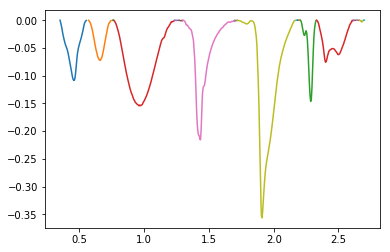

In [70]:
#then we can split the array along the indices using list comprehension:
splitSample=[[pSample[0][splitInd[i]:splitInd[i+1]],hullRemoved[splitInd[i]:splitInd[i+1]]] 
             for i in range(len(splitInd)-1) if splitInd[i+1]-splitInd[i]>2]
for s in splitSample:
    plt.plot(s[0],s[1],'-')
plt.show()

In [71]:
# Finding local minima is then straightforward:
listMinimaX=[x[0][np.argmin(x[1])] for x in np.asarray(splitSample)]
print(listMinimaX)

[0.46, 0.66, 0.76, 0.9599989999999999, 1.25001, 1.28001, 1.4350100000000001, 1.70502, 1.91002, 2.18003, 2.19003, 2.19503, 2.28503, 2.40003, 2.62004, 2.63504, 2.6450400000000003, 2.65504, 2.68004, 2.70004]


In [72]:
# we can use list comprehension again to get corresponding Y-values
listMinimaY=[pSample[1][pSample[0].index(x)] for x in listMinimaX]
print(listMinimaY)

[0.0936, 0.3648, 0.5147, 0.4103, 0.635003, 0.639201, 0.422043, 0.6288, 0.23185300000000003, 0.531887, 0.5271859999999999, 0.524783, 0.317399, 0.29978499999999997, 0.19517, 0.180558, 0.16955499999999998, 0.15684700000000001, 0.109126, 0.06779199999999999]


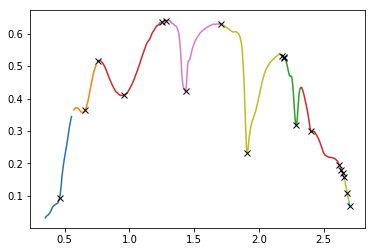

In [73]:
#And we can combine the two and plot the minima on a graph:
splitSample=[[pSample[0][splitInd[i]:splitInd[i+1]],pSample[1][splitInd[i]:splitInd[i+1]]] 
             for i in range(len(splitInd)-1) if splitInd[i+1]-splitInd[i]>2]
for s in splitSample:
    plt.plot(s[0],s[1],'-')
plt.plot(listMinimaX,listMinimaY,'x',color='black')
plt.show()

In [74]:
# We've now identified some deep absorption bands, a some shallow that are probably noise.
# We can filter out the shallow ones by appling a threshold:
# First get the band depths with hull removed:
listMinimaYhullRemoved=[hullRemoved[pSample[0].index(x)] for x in listMinimaX]
print(listMinimaYhullRemoved)

[-0.10841463414634146, -0.07256571428571434, -0.00039999999999995595, -0.1543199670212766, -0.00045495458440447667, -0.0009979999999999434, -0.21557838444038896, -0.0012664999999999482, -0.3565610083294872, -4.850000000000687e-05, -4.8000000000048004e-05, 0.0, -0.14634099999999994, -0.07582942307287449, -0.0007385000000001696, -0.00029600000000001847, -9.349999999977432e-05, -0.000257200000000235, -0.0032230000000004616, -6.666666666627075e-07]


In [75]:
# Now apply a threshold:
threshold=0.05
listMinimaSigX=[q[0] for q in list(zip(listMinimaX,listMinimaYhullRemoved)) if q[1]<-threshold]
listMinimaSigYhullRemoved=[q[1] for q in list(zip(listMinimaX,listMinimaYhullRemoved)) if q[1]<-threshold]
listMinimaSigY=[pSample[1][pSample[0].index(x)] for x in listMinimaSigX]

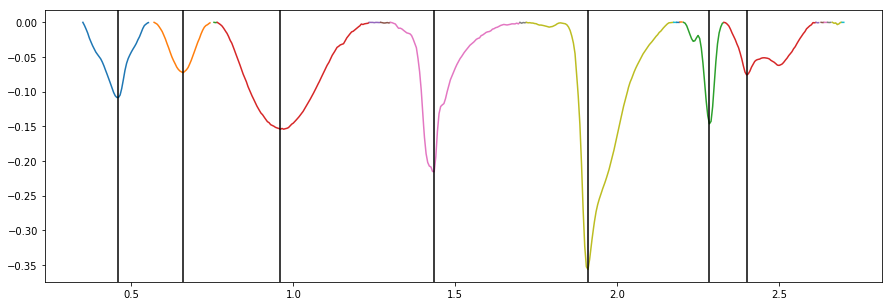

In [76]:
#then we can split the array along the indices using list comprehension:
splitSample=[[pSample[0][splitInd[i]:splitInd[i+1]],hullRemoved[splitInd[i]:splitInd[i+1]]] 
             for i in range(len(splitInd)-1) if splitInd[i+1]-splitInd[i]>2]
plt.figure(figsize=(15,5)) #make larger figure
for s in splitSample:
    plt.plot(s[0],s[1],'-')
for xc in listMinimaSigX:
    plt.axvline(x=xc,color='black')
plt.show()

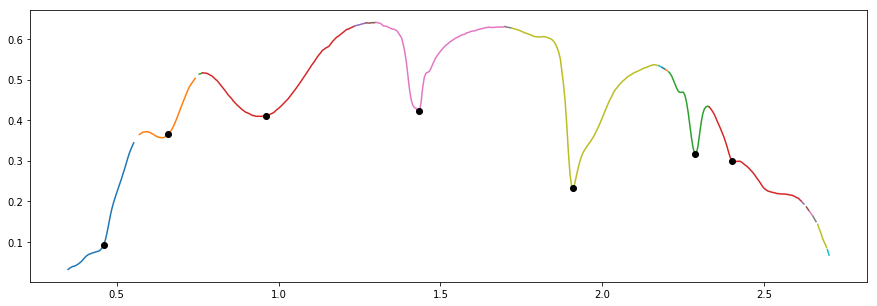

In [77]:
# Finally, lets see where do these band depths plot on original spectra:
plt.figure(figsize=(15,5))
splitSample=[[pSample[0][splitInd[i]:splitInd[i+1]],pSample[1][splitInd[i]:splitInd[i+1]]] 
             for i in range(len(splitInd)-1) if splitInd[i+1]-splitInd[i]>2]
for s in splitSample:
    plt.plot(s[0],s[1],'-')
plt.plot(listMinimaSigX,listMinimaSigY,'o',color='black')
plt.show()

In [86]:
print("adsorption band center wavelenghts are:")
for item in listMinimaSigX:
    print(item, "micrometers")

adsorption band locations are:
0.46 micrometers
0.66 micrometers
0.9599989999999999 micrometers
1.4350100000000001 micrometers
1.91002 micrometers
2.28503 micrometers
2.40003 micrometers


The same approach could be used e.g. for XRD spectra or alike

# Tasks

## T5.3: Spectral analysis

Please perform the operations above (in a new notebook, properly renamed) for the labotory spectrum of Montmorillonite, i.e. ```montmorillonite-1292F35-RELAB.txt```.

Please document any isssue/trouble